In [1171]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import math, datetime
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
# from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression

In [1172]:
# Read the csv file into a pandas DataFrame
unemployment = pd.read_csv('../../Clean Data/pandas_cleaned/unemployment_rate_model_data.csv', header=0, 
                  index_col='date',
                  parse_dates=True)
unemployment.head()

,unemployment_rate,date.1
date,,
1948-01-01,3.3,1/1/1948
1948-04-01,3.3,4/1/1948
1948-07-01,3.3,7/1/1948
1948-10-01,3.4,10/1/1948
1949-01-01,4.1,1/1/1949


In [1175]:
unemployment['date_1'] = pd.to_datetime([
     '-'.join(x.split()[::-1]) for x in unemployment['date.1']])

In [1176]:
unemployment = unemployment.drop(columns = ["date.1"])

In [1177]:
unemployment.head()

,unemployment_rate,date_1
date,,
1948-01-01,3.3,1948-01-01
1948-04-01,3.3,1948-04-01
1948-07-01,3.3,1948-07-01
1948-10-01,3.4,1948-10-01
1949-01-01,4.1,1949-01-01


In [1178]:
# unemployment = unemployment.rename(columns = {
#     "Period" : "Period",
#     "Unemployment(%)" : "unemployment_rate",
# })

In [1179]:
unemployment.head(10)

,unemployment_rate,date_1
date,,
1948-01-01,3.3,1948-01-01
1948-04-01,3.3,1948-04-01
1948-07-01,3.3,1948-07-01
1948-10-01,3.4,1948-10-01
1949-01-01,4.1,1949-01-01
1949-04-01,5.3,1949-04-01
1949-07-01,6.1,1949-07-01
1949-10-01,6.4,1949-10-01
1950-01-01,5.8,1950-01-01


In [1180]:
# unemployment['date'] = pd.to_datetime([
#     '-'.join(x.split()[::-1]) for x in unemployment['Period']])

# # datetime.date(2002, 12,4).strftime("%Y%m%d")
# # '20021204'


# # from datetime import datetime
# # unemployment['date'] = unemployment["date"].astype(int)
# # datetime_list = []
# # for i in range (len(unemployment['date'])):
# #     unemployment.append(datetime.strftime(unemployment['date'][i],'%Y%m%d'))


# # from datetime import datetime
# # unemployment['date'] = unemployment['date'].astype(int)
# # datetime_list = []
# # for i in range(len(unemployment)):
# #     unemployment.append(datetime.strptime(unemployment['date'][i],'%m/%d/%Y'))

In [1181]:
unemployment.dtypes

unemployment_rate           float64
date_1               datetime64[ns]
dtype: object

In [1182]:
X = unemployment.date_1.values.reshape(-1, 1)
y = unemployment.unemployment_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (289, 1) (289, 1)


Text(0, 0.5, 'Unemployment Rate')

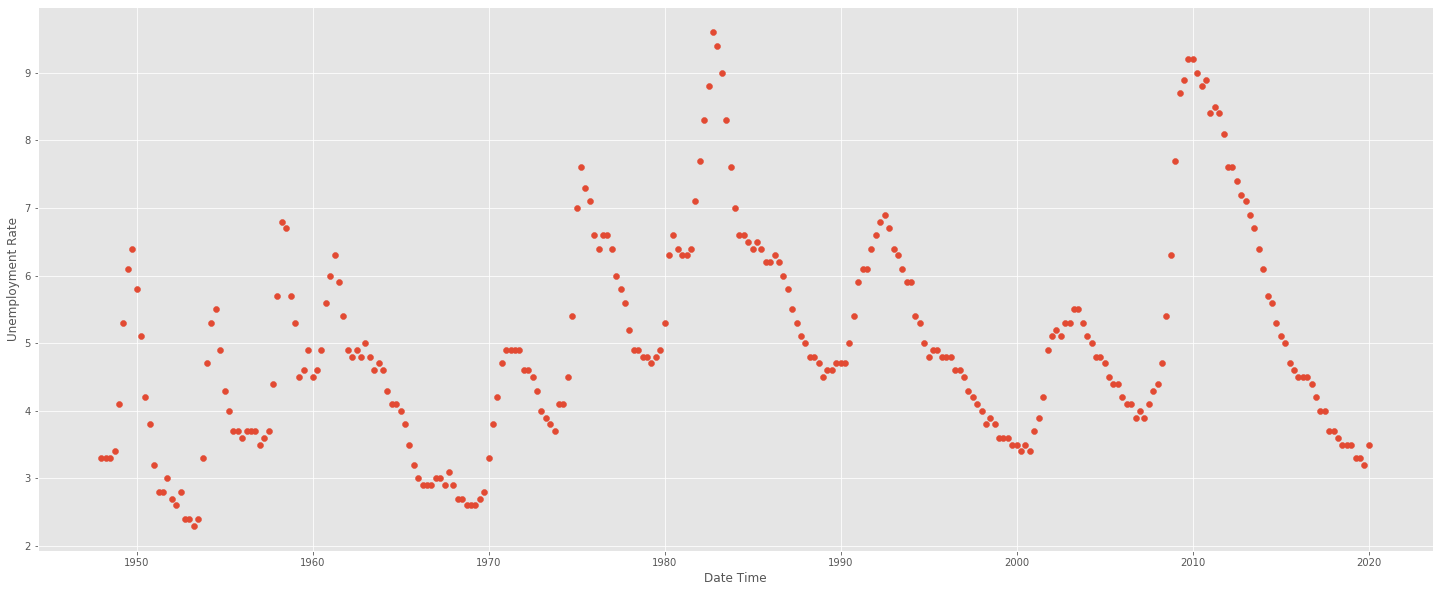

In [1183]:
from matplotlib.pyplot import figure
figure (figsize = (25, 10))
plt.scatter(X, y)
plt.xlabel("Date Time")
plt.ylabel("Unemployment Rate")

In [1185]:
df = unemployment[["unemployment_rate", "date_1"]]

In [1186]:
forecast_col = "unemployment_rate"

In [1187]:
forecast_out = int(math.ceil(0.01*len(df)))

In [1188]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [1189]:
print(df.count())

unemployment_rate    289
date_1               289
label                286
dtype: int64


In [1190]:
# COULDN'T GET IT TO ACCEPT DATE IN ANOTHER WAY AND DIDN'T WANT IT TO REALLY, JUST WANTED IT TO

X = np.array(df.drop(["label", "date_1"],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [1191]:
df.dropna(inplace = True)
y = np.array(df["label"])
y = np.array(df["label"])

In [1192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [1193]:
clf = svm.SVR("poly", degree =1)
clf.fit(X_train, y_train)

C:\Users\stroh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [1194]:
accuracy = clf.score(X_test, y_test)

In [1195]:
# what is exciting is I believe forecast out's units is in quarters so this could predict almost a year out ideally

print(accuracy)
print (f"Forecast out is = {forecast_out}")

0.572565795889132
Forecast out is = 3


In [1196]:
forecast_set = clf.predict(X_lately)

In [1197]:
print(forecast_set, accuracy, forecast_out)

[3.42500028 3.42500028 3.24772761] 0.572565795889132 3


In [1198]:
df["Forecast"] = np.nan

In [1199]:
last_quarter = df.iloc[-1].name
last_unix = last_quarter.timestamp()
one_quarter = 3*(2628000)
next_unix = last_unix + one_quarter

In [1200]:
for i in forecast_set:
    next_quarter = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_quarter
    df.loc[next_quarter] = [np.nan for _ in range(len(df.columns)-1)] + [i]

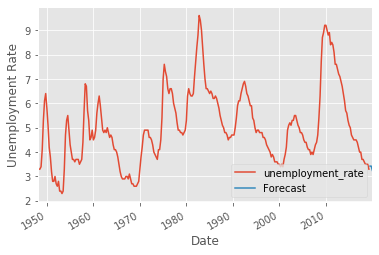

<Figure size 1800x720 with 0 Axes>

In [1209]:
df["unemployment_rate"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
# plt.xlim(2000, 2020)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
figure (figsize = (25, 10))
plt.show()